In [1]:
import pandas as pd
import json

# df = pd.read_csv("data\part-00000-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv")
df = pd.read_csv("data/part-00157-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv")
df.rename(columns={'Magnitue': 'Magnitude'}, inplace=True)
print(df.columns)
print("\n")
print(df.head(5))

Index(['flow_duration', 'Header_Length', 'Protocol Type', 'Duration', 'Rate',
       'Srate', 'Drate', 'fin_flag_number', 'syn_flag_number',
       'rst_flag_number', 'psh_flag_number', 'ack_flag_number',
       'ece_flag_number', 'cwr_flag_number', 'ack_count', 'syn_count',
       'fin_count', 'urg_count', 'rst_count', 'HTTP', 'HTTPS', 'DNS', 'Telnet',
       'SMTP', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC',
       'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number',
       'Magnitude', 'Radius', 'Covariance', 'Variance', 'Weight', 'label'],
      dtype='object')


   flow_duration  Header_Length  Protocol Type  Duration        Rate  \
0       0.621457          71.28           6.00     64.00    1.029826   
1       0.000000          54.00           6.00     64.00   23.345137   
2       0.000000          54.00           6.00     64.00  195.657228   
3       1.554891         148.50           6.00     64.00    3.122125   
4       0.000000           2.

C:\Users\Arka\AppData\Local\Temp\ipykernel_30252\2395390751.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='Magnitude', data=df, palette='Set3')


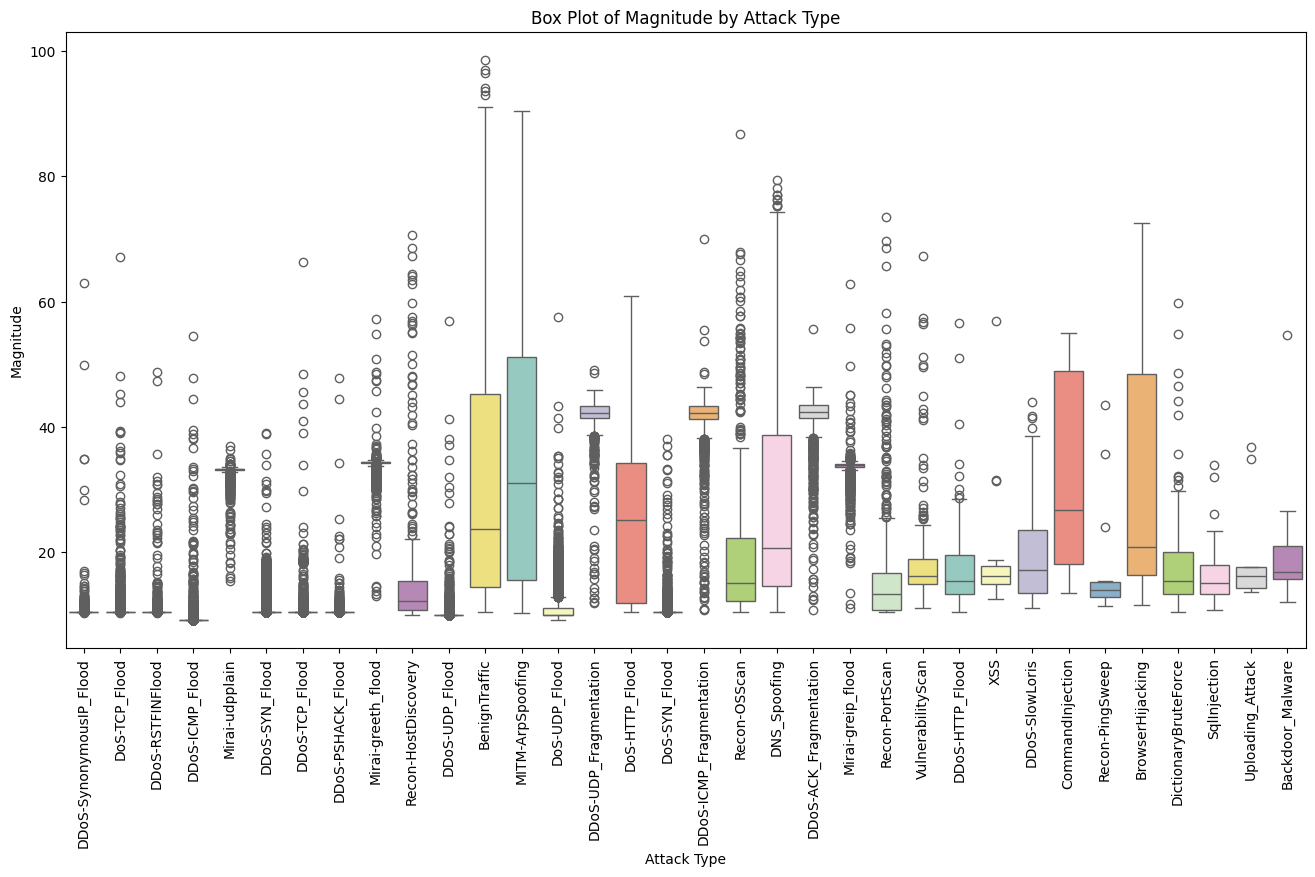

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
plt.figure(figsize=(16, 8))

sns.boxplot(x='label', y='Magnitude', data=df, palette='Set3')

plt.xlabel('Attack Type')
plt.ylabel('Magnitude')
plt.title('Box Plot of Magnitude by Attack Type')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

# selected_columns = ['label', 'Magnitude']
# selected_data = df[selected_columns]
# # Save the selected data to a JSON file
# selected_data.to_json('JSON/boxplot_data.json', orient='records', lines=True)

# # Select only 'label' and 'Magnitude' columns and every 4th row for every label
# selected_data = df[['label', 'Magnitude']].groupby('label').apply(lambda x: x.iloc[::4]).reset_index(drop=True)

# # Save the selected data to a JSON file
# selected_data.to_json('JSON/boxplot_data_selected.json', orient='records', lines=True)

# Select only 'label' and 'Magnitude' columns
selected_data = df[['label', 'Magnitude']]

# Group by 'label' and aggregate 'Magnitude' values into a list
grouped_data = selected_data.groupby('label')['Magnitude'].agg(list).reset_index()

# Select 1 in 4 entries for every label
selected_data_1_in_4 = grouped_data.groupby('label').apply(lambda x: x.iloc[::4]).reset_index(drop=True)

# Save the selected data to a JSON file
selected_data_1_in_4.to_json('JSON/boxplot_data.json', orient='records', lines=False)

C:\Users\Arka\AppData\Local\Temp\ipykernel_30252\3125886586.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Duration', y='label', data=df, palette='Set3', orient='h')


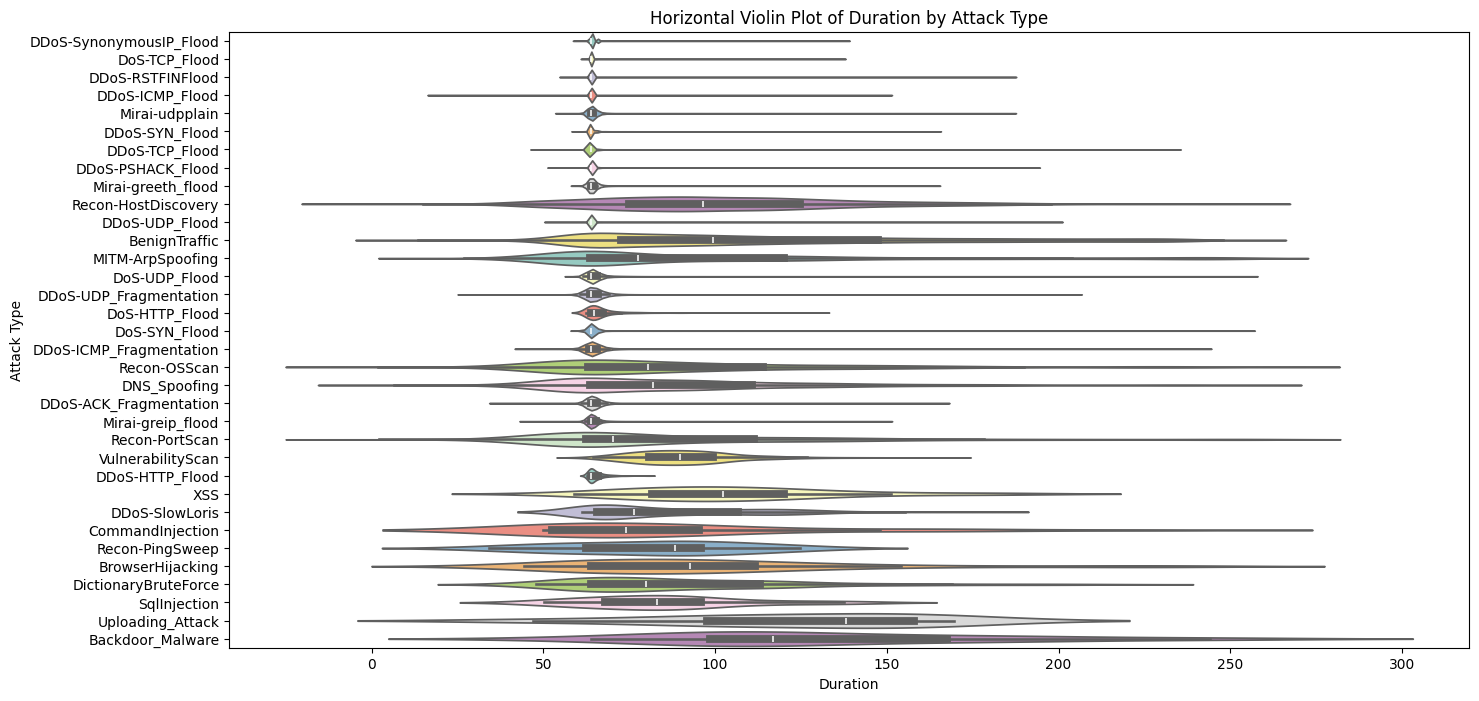

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
plt.figure(figsize=(16, 8))

sns.violinplot(x='Duration', y='label', data=df, palette='Set3', orient='h')

plt.xlabel('Duration')
plt.ylabel('Attack Type')
plt.title('Horizontal Violin Plot of Duration by Attack Type')
plt.show()

# selected_columns = ['label', 'Duration']
# selected_data = df[selected_columns]
# # Save the selected data to a JSON file
# selected_data.to_json('JSON/violin-plot_Duration_data.json', orient='records', lines=True)

# Group the DataFrame by 'label' and convert each group to a list
grouped_data = df.groupby('label')['Duration'].apply(list)

# Convert the grouped data to a list of dictionaries
data = [{'label': label, 'Duration': durations} for label, durations in grouped_data.items()]

# Write the Python object to a file
with open('JSON/violin-plot_Duration_data.json', 'w') as f:
    json.dump(data, f, indent=4)

C:\Users\Arka\AppData\Local\Temp\ipykernel_30252\169089195.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Tot size', y='label', data=df, palette='Set3', orient='h')


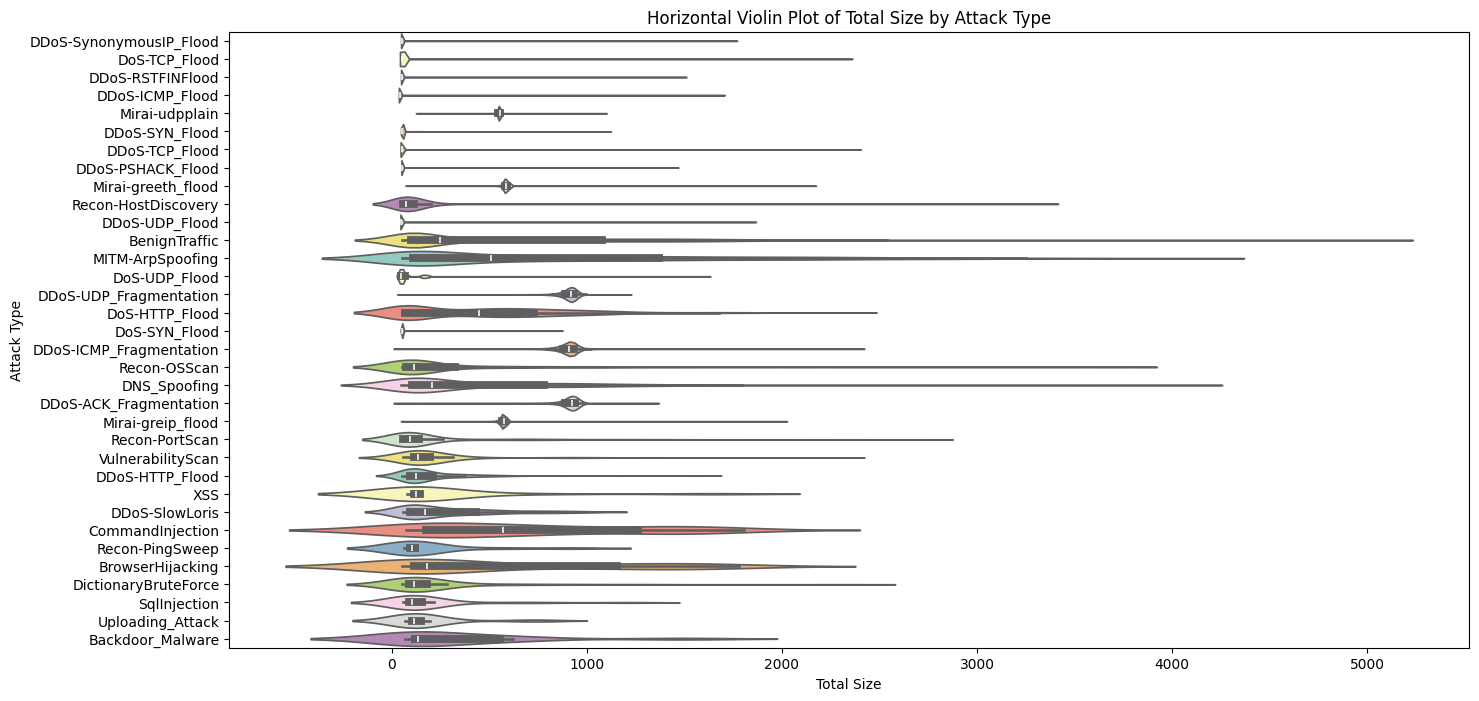

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
plt.figure(figsize=(16, 8))

sns.violinplot(x='Tot size', y='label', data=df, palette='Set3', orient='h')

plt.xlabel('Total Size')
plt.ylabel('Attack Type')
plt.title('Horizontal Violin Plot of Total Size by Attack Type')
plt.show()

selected_columns = ['label', 'Tot size']
selected_data = df[selected_columns]
# Save the selected data to a JSON file
selected_data.to_json('JSON/violin-plot_Size_data.json', orient='records', lines=True)

C:\Users\Arka\AppData\Local\Temp\ipykernel_30252\1449017247.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(y='Tot size', x='ack_count', data=df, palette='Set3')


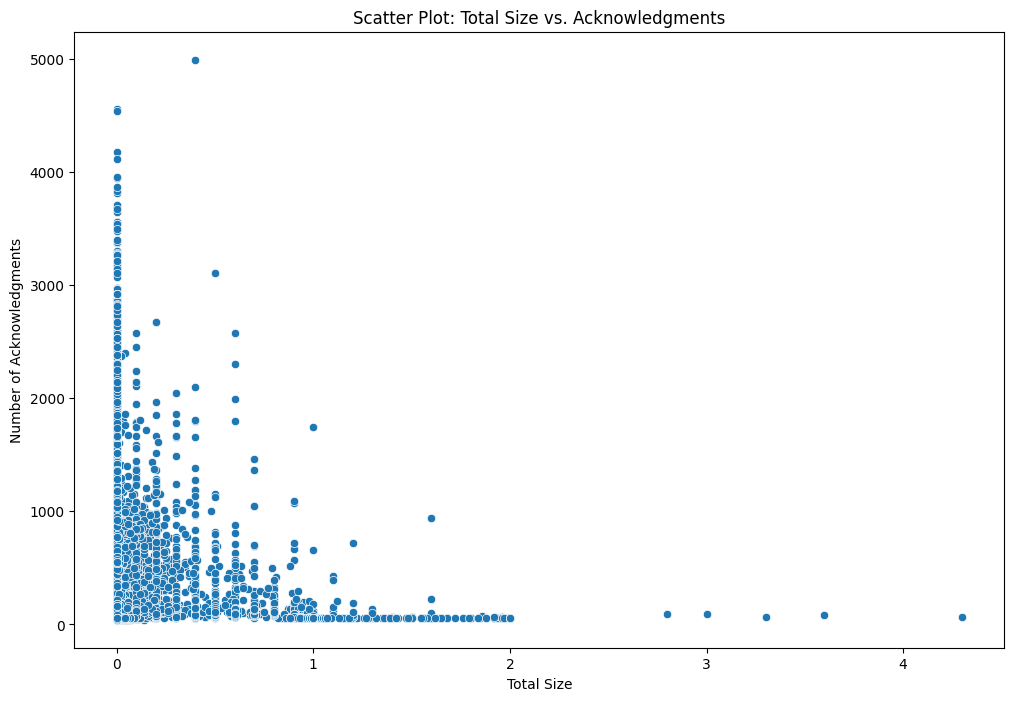

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
plt.figure(figsize=(12, 8))

sns.scatterplot(y='Tot size', x='ack_count', data=df, palette='Set3')

plt.xlabel('Total Size')
plt.ylabel('Number of Acknowledgments')
plt.title('Scatter Plot: Total Size vs. Acknowledgments')
plt.show()

selected_columns = ['Tot size', 'ack_count']
selected_data = df[selected_columns]
# Save the selected data to a JSON file
selected_data.to_json('JSON/scatter-plot_data.json', orient='records', lines=True)

C:\Users\Arka\AppData\Local\Temp\ipykernel_30252\365510694.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Duration', y='Tot size', hue='label', data=df, palette='Set3', ci=None)


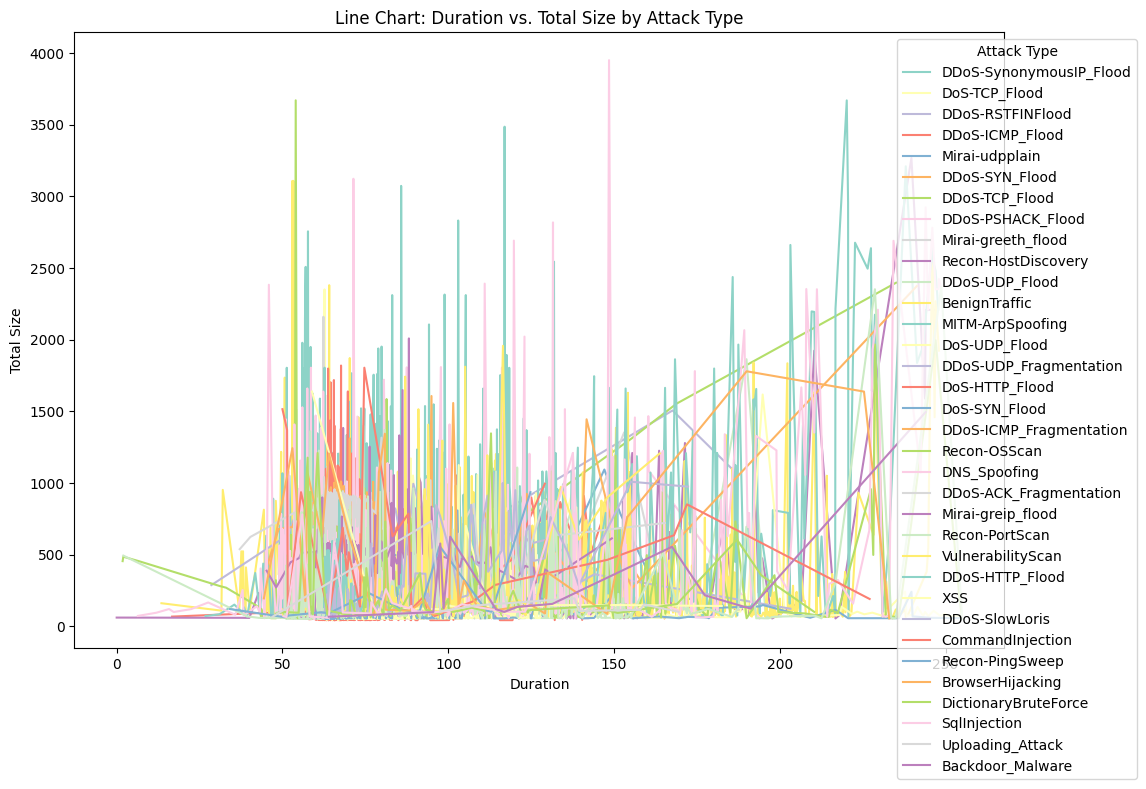

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
plt.figure(figsize=(12, 8))

sns.lineplot(x='Duration', y='Tot size', hue='label', data=df, palette='Set3', ci=None)

plt.xlabel('Duration')
plt.ylabel('Total Size')
plt.title('Line Chart: Duration vs. Total Size by Attack Type')
plt.legend(title='Attack Type', loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()

selected_columns = ['Duration', 'Tot size']
selected_data = df[selected_columns]
# Save the selected data to a JSON file
selected_data.to_json('JSON/line-plot_data.json', orient='records', lines=True)

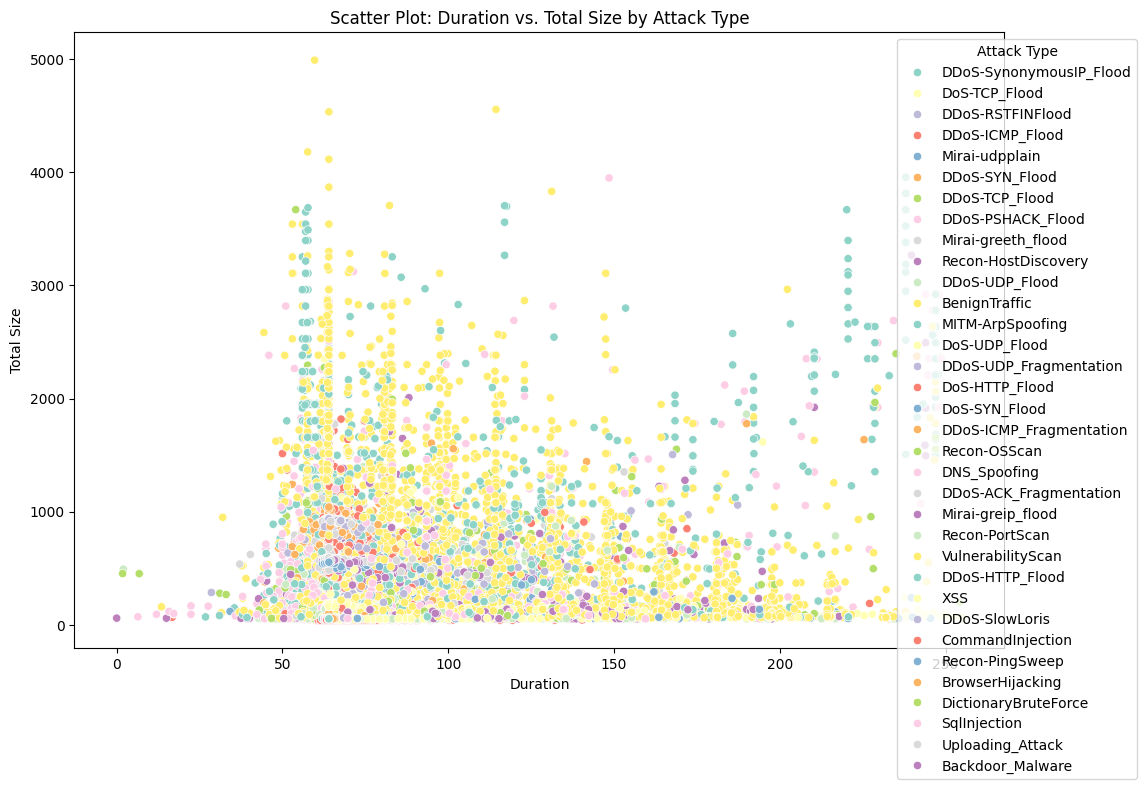

In [23]:
# BETTER CHOICE FOR TEMPORAL DATA

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
plt.figure(figsize=(12, 8))

sns.scatterplot(x='Duration', y='Tot size', hue='label', data=df, palette='Set3')

plt.xlabel('Duration')
plt.ylabel('Total Size')
plt.title('Scatter Plot: Duration vs. Total Size by Attack Type')
plt.legend(title='Attack Type', loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()

import json

selected_columns = ['Duration', 'Tot size', 'label']
grouped_data = df[selected_columns]

# Group by 'label' and aggregate 'Duration' and 'Tot size' values into a list
selected_data = grouped_data.groupby('label').agg(list)

# Select 1 in 4 entries for every label
selected_data = selected_data.apply(lambda x: x.iloc[::3]).reset_index()

# Convert DataFrame to JSON string
json_str = selected_data.to_json(orient='records')

# Parse JSON string to Python object
data = json.loads(json_str)

# Write pretty-printed JSON to file
with open('JSON/scatter-plot_Size_data.json', 'w') as f:
    json.dump(data, f, indent=4)

In [24]:
# from math import pi

# # Choose relevant columns for the spider chart
# spider_columns = [
#     'flow_duration', 'Header_Length', 'ack_flag_number', 'syn_flag_number',
#     'fin_flag_number', 'ack_count', 'syn_count', 'fin_count', 'Rate', 'Srate',
#     'Drate', 'Tot size', 'IAT', 'Number', 'Magnitue', 'Radius'
# ]

# # Select the top 5 attack types based on the frequency
# top_attack_types = df['label'].value_counts().nlargest(5).index

# # Filter the DataFrame for the top 5 attack types
# df_top_attack_types = df[df['label'].isin(top_attack_types)]

# # ------- PART 1: Create background

# # Number of variables
# N = len(spider_columns)

# # What will be the angle of each axis in the plot? (we divide the plot / number of variables)
# angles = [n / float(N) * 2 * pi for n in range(N)]
# angles += angles[:1]

# # Initialise the spider plot
# ax = plt.subplot(111, polar=True)

# # If you want the first axis to be on top:
# ax.set_theta_offset(pi / 2)
# ax.set_theta_direction(-1)

# # Draw one axe per variable + add labels yet
# plt.xticks(angles[:-1], spider_columns, fontsize=8, ha='right')

# # Draw ylabels
# ax.set_rlabel_position(0)
# plt.yticks([10, 20, 30], ["10", "20", "30"], color="grey", size=7)
# plt.ylim(0, 40)

# # ------- PART 2: Add plots

# # Plot each individual = each line of the data
# for label in top_attack_types:
#     values = df_top_attack_types[df_top_attack_types['label'] == label][spider_columns].mean().tolist()
#     values += values[:1]

#     # Plot the line
#     ax.plot(angles, values, linewidth=1, linestyle='solid', label=label, alpha=0.5)  # Reduce alpha for transparency

#     # Fill the area to show variance
#     ax.fill(angles, values, alpha=0.1)

# # Add legend
# plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# # Show the plot
# plt.title('Spider Chart for Selected Columns Across Top 5 Attack Types')
# plt.show()

In [25]:
# import pandas as pd
# import numpy as np

# # Assuming your DataFrame is named 'df'

# # Step 1: Select numerical columns
# numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

# # Step 2: Calculate variance for each numerical column
# variances = df[numerical_cols].var()

# # Step 3: Select the top 5 columns with the highest variance
# top_variance_cols = variances.nlargest(5).index.tolist()

# # Step 4: Find the top 2 labels for each of the top 5 columns
# top_labels = {}
# for col in top_variance_cols:
#     top_labels[col] = df.groupby('label')[col].mean().nlargest(2).index.tolist()

# # Display the result
# print("Top 2 Labels for Each Top 5 Columns:")
# for col, labels in top_labels.items():
#     print(f"\nColumn: {col}")
#     print(f"Top 2 Labels: {labels}")

In [26]:
# # Step 1: Select numerical columns
# numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

# # Step 2: Calculate variance for each numerical column and select the top 10
# top_variance_cols = df[numerical_cols].var().nlargest(10).index.tolist()

# # Step 3: Print the top 10 columns with the highest numeric variance
# print("Top 10 Columns with Highest Numeric Variance:")
# print(top_variance_cols)

# # Step 4: Print mean, median, max, min, and standard deviation for each column across the top 10 labels
# top_labels = df['label'].value_counts().nlargest(10).index.tolist()

# for col in top_variance_cols:
#     print(f"\nStatistics for '{col}' across the top 10 labels:")
#     for label in top_labels:
#         values = df[df['label'] == label][col]
#         print(f"{label}: Mean = {values.mean():.2f}, Median = {values.median():.2f}, Max = {values.max():.2f}, Min = {values.min():.2f}, Std Dev = {values.std():.2f}")

In [27]:
# import pandas as pd
# import numpy as np

# # Step 1: Select numerical columns
# numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

# # Step 2: Calculate variance for each numerical column and select the top 10
# top_variance_cols = df[numerical_cols].var().nlargest(10).index.tolist()

# # Step 3: Print the top 10 columns with the highest numeric variance
# print("Top 10 Columns with Highest Numeric Variance:")
# print(", ".join(top_variance_cols))

# # Step 4: Print mean, median, max, min, and standard deviation for each column across the top 10 labels
# top_labels = df['label'].value_counts().nlargest(10).index.tolist()

# for col in top_variance_cols:
#     print(f"\nStatistics for '{col}' across the top 10 labels:")
#     for label in top_labels:
#         values = df[df['label'] == label][col]
#         print(f"{label}: Mean = {values.mean():.2f}, Median = {values.median():.2f}, Max = {values.max():.2f}, Min = {values.min():.2f}, Std Dev = {values.std():.2f}")


In [28]:
import pandas as pd
import numpy as np

# Step 1: Select numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

# Step 2: Calculate variance for each numerical column and select the top 10
top_variance_cols = df[numerical_cols].var().nlargest(10).index.tolist()

# Step 3: Print the top 10 columns with the highest numeric variance
print("Top 10 Columns with Highest Numeric Variance:")
print(", ".join(top_variance_cols))

# Step 4: Print mean, median, max, min, and standard deviation for each column across the top 10 labels
top_labels = df['label'].value_counts().nlargest(10).index.tolist()

result_data = {}

for col in top_variance_cols:
    result_data[col] = {}  # Initialize an empty dictionary for each column
    print(f"\nStatistics for '{col}' across the top 10 labels:")
    for label in top_labels:
        values = df[df['label'] == label][col]
        # print(f"{label}: Mean = {values.mean():.2f}, Median = {values.median():.2f}, Max = {values.max():.2f}, Min = {values.min():.2f}, Std Dev = {values.std():.2f}")
        print(f"{label}: Mean = {values.mean():.2f}")
        result_data[col][label] = values.mean()

result_json = pd.DataFrame(result_data)
result_json.to_json("JSON/mean_data.json", orient="index", indent=4)


Top 10 Columns with Highest Numeric Variance:
IAT, Header_Length, Covariance, Rate, Srate, Tot sum, Max, rst_count, flow_duration, Tot size

Statistics for 'IAT' across the top 10 labels:
DDoS-ICMP_Flood: Mean = 83152343.01
DDoS-UDP_Flood: Mean = 83112939.89
DDoS-TCP_Flood: Mean = 83052210.41
DDoS-PSHACK_Flood: Mean = 83319668.59
DDoS-RSTFINFlood: Mean = 83348220.32
DDoS-SYN_Flood: Mean = 83097347.02
DDoS-SynonymousIP_Flood: Mean = 83360158.18
DoS-UDP_Flood: Mean = 83005684.48
DoS-TCP_Flood: Mean = 82919880.57
DoS-SYN_Flood: Mean = 82947407.27

Statistics for 'Header_Length' across the top 10 labels:
DDoS-ICMP_Flood: Mean = 481.55
DDoS-UDP_Flood: Mean = 25199.86
DDoS-TCP_Flood: Mean = 163.06
DDoS-PSHACK_Flood: Mean = 151.13
DDoS-RSTFINFlood: Mean = 702.42
DDoS-SYN_Flood: Mean = 192.08
DDoS-SynonymousIP_Flood: Mean = 276.46
DoS-UDP_Flood: Mean = 19607.29
DoS-TCP_Flood: Mean = 2655.89
DoS-SYN_Flood: Mean = 2793.02

Statistics for 'Covariance' across the top 10 labels:
DDoS-ICMP_Flood: Me

In [29]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt

# # Step 1: Select numerical columns
# numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

# # Step 2: Calculate variance for each numerical column and select the top 10
# top_variance_cols = df[numerical_cols].var().nlargest(10).index.tolist()

# # Step 3: Print the top 10 columns with the highest numeric variance
# print("Top 10 Columns with Highest Numeric Variance:")
# print(", ".join(top_variance_cols))

# # Step 4: Print mean, median, max, min, and standard deviation for each column across the top 10 labels
# top_labels = df['label'].value_counts().nlargest(10).index.tolist()

# normalized_data = pd.DataFrame()

# for col in top_variance_cols:
#     # Normalize the data between 0 and 100
#     normalized_data[col] = ((df[col] - df[col].min()) / (df[col].max() - df[col].min()))

# # Print normalized data for verification
# print("\nNormalized Data:")
# print(normalized_data.head())

# # Create a figure and axis with polar projection
# fig, ax = plt.subplots(subplot_kw=dict(polar=True))

# # Number of variables
# num_vars = len(top_variance_cols)

# # Compute angle of each axis
# angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# # Repeat the first angle to close the circle
# angles += angles[:1]

# # Plot each label's values on the radar chart
# for label in top_labels:
#     values = normalized_data.loc[df['label'] == label, top_variance_cols].mean().tolist()
#     values += values[:1]  # Repeat the first value to close the circle
#     ax.plot(angles, values, label=label, linewidth=2)

# # Fill the area under the lines
# ax.fill(angles, values, alpha=0.25)

# # Set labels for each point
# ax.set_thetagrids(np.degrees(angles[:-1]), labels=top_variance_cols)

# # Add a legend
# ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# # Show the plot
# plt.show()

Top 10 Columns with Highest Numeric Variance (excluding 'IAT'):
Header_Length, Covariance, Rate, Srate, Max, rst_count, flow_duration, Tot size, AVG, Radius

Rescaled Data:
   Header_Length  Covariance       Rate      Srate       Max  rst_count  \
0       7.378044         0.0   0.175378   0.175378  3.600576        0.0   
1       5.589427         0.0   3.975653   3.975653  3.600576        0.0   
2       5.589427         0.0  26.670390  26.670390  3.600576        0.0   
3      15.370925         0.0   0.531695   0.531695  3.600576        0.0   
4       0.221507         0.0   6.076157   6.076157  9.805569        0.0   

   flow_duration  Tot size       AVG  Radius  
0            0.0  2.425271  2.398946     0.0  
1            0.0  2.425271  2.398946     0.0  
2            0.0  2.425271  2.398946     0.0  
3            0.0  2.425271  2.398946     0.0  
4            0.0  0.347622  0.893230     0.0  


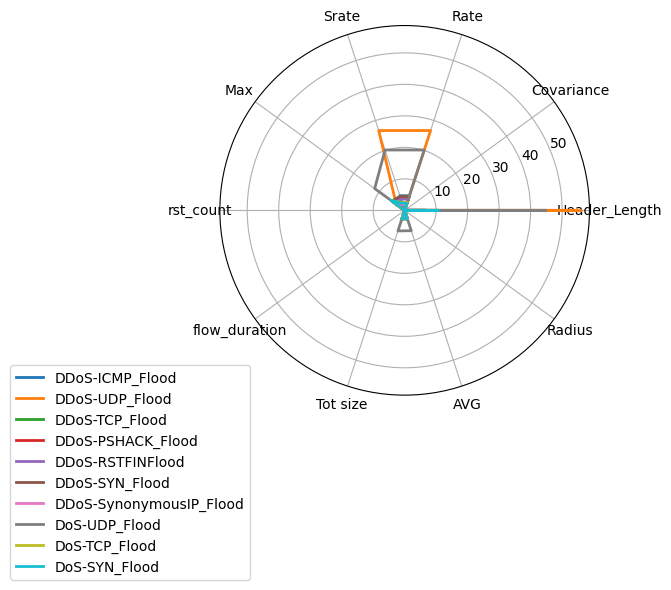

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Select numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

# Remove "IAT" and "Tot sum" from the list of numerical columns
numerical_cols = [col for col in numerical_cols if col not in ["IAT", "Tot sum"]]

# Step 2: Calculate variance for each numerical column (excluding "IAT") and select the top 10
top_variance_cols = df[numerical_cols].var().nlargest(10).index.tolist()

# Step 3: Print the top 10 columns with the highest numeric variance
print("Top 10 Columns with Highest Numeric Variance (excluding 'IAT'):")
print(", ".join(top_variance_cols))

# Step 4: Print mean, median, max, min, and standard deviation for each column across the top 10 labels
top_labels = df['label'].value_counts().nlargest(10).index.tolist()

normalized_data = pd.DataFrame()

# Calculate the dynamic rescale factor for each column
# rescale_factors = {col: 10 ** (int(np.log10(df[col].max())) - 1) for col in top_variance_cols}
rescale_factors = {col: 10 ** (int(np.log10(df[col].max()))) for col in top_variance_cols}

for col in top_variance_cols:
    # Normalize the data between 0 and 1
    normalized_data[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())
    # Rescale the normalized data based on the dynamic factor
    normalized_data[col] *= rescale_factors[col]

    # Filter out values that are significantly larger than the mean of the column
    threshold = 10 * normalized_data[col].median()
    normalized_data[col] = np.where(normalized_data[col] > threshold, threshold, normalized_data[col])

# Print normalized data for verification
print("\nRescaled Data:")
print(normalized_data.head())

# Save the normalized data to a JSON file
normalized_data.to_json("JSON/spider-plot_normalized_data.json", orient="index", indent=4)

# Create a figure and axis with polar projection
fig, ax = plt.subplots(subplot_kw=dict(polar=True))

# Number of variables
num_vars = len(top_variance_cols)

# Compute angle of each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Repeat the first angle to close the circle
angles += angles[:1]

# Plot each label's values on the radar chart
for label in top_labels:
    values = normalized_data.loc[df['label'] == label, top_variance_cols].mean().tolist()
    values += values[:1]  # Repeat the first value to close the circle
    ax.plot(angles, values, label=label, linewidth=2)

# Fill the area under the lines
ax.fill(angles, values, alpha=0.25)

# Set labels for each point
ax.set_thetagrids(np.degrees(angles[:-1]), labels=top_variance_cols)

# Add a legend
ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Show the plot
plt.show()
